In [119]:
import pandas as  pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import seaborn as sns

In [120]:
#import file
df=pd.read_csv("D:\\Users\\Default User\\Desktop\\Reva Assignments\\PredictiveAnalytics2\dataset\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [121]:
from IPython.core.interactiveshell import InteractiveShell

In [122]:
InteractiveShell.ast_node_interactivity="all"

In [123]:
df.shape
type(df)
df.size
df.head()
df.tail()

(7032, 21)

pandas.core.frame.DataFrame

147672

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [124]:
pd.isnull(df).any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [125]:
pd.isnull(df).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [128]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [130]:
print('Counts of Labels')
df.groupby("Churn").size()

Counts of Labels


Churn
No     5163
Yes    1869
dtype: int64

In [131]:
from sklearn import preprocessing

In [132]:
le=preprocessing.LabelEncoder()

In [133]:
le.fit(df["Churn"])

LabelEncoder()

In [134]:
list(le.classes_)

['No', 'Yes']

In [135]:
dfn=le.transform(df["Churn"])

In [136]:
le.inverse_transform([0,1])

C:\Users\nchathot\AppData\Local\Continuum\ana_new\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['No', 'Yes'], dtype=object)

In [137]:
df['Y']=dfn

In [138]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
Y                   7032 non-nul

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Y'],
      dtype='object')

In [139]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Y
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0


In [140]:
x_catg=df.loc[:,('gender','Partner', 'Dependents','PhoneService', 'MultipleLines',
                'InternetService',
       'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',  'PaymentMethod')]

In [141]:
x_catg.head()
x_catg.shape

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


(7032, 15)

In [142]:
x_num=df.loc[:,('SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges')]
x_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [143]:
x_num1=pd.get_dummies(x_catg)
x_num1.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [144]:
x=pd.concat([x_num1,x_num],axis=1)
x.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,29.85,29.85
1,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,34,56.95,1889.50
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,2,53.85,108.15
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,45,42.30,1840.75
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,2,70.70,151.65


In [145]:
y=df['Y']

In [146]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Y, dtype: int64

In [147]:
#Create Train and Test Data with 75% and 25% split

In [148]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)

In [149]:
train_x.shape
test_x.shape

(5274, 45)

(1758, 45)

In [150]:
train_y.shape
test_y.shape
type(train_x)
train_x


(5274,)

(1758,)

pandas.core.frame.DataFrame

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4525,1,0,0,1,1,0,0,1,0,0,...,0,1,1,0,0,0,0,71,105.15,7555.00
5066,1,0,1,0,0,1,0,1,1,0,...,1,0,0,1,0,0,0,49,19.45,921.30
2688,0,1,1,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,72,19.30,1414.80
6086,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,4,19.65,67.55
4544,1,0,1,0,1,0,0,1,1,0,...,0,1,0,1,0,0,0,9,20.45,147.55
4469,0,1,0,1,0,1,0,1,1,0,...,0,1,1,0,0,0,0,19,48.95,955.60
2037,1,0,1,0,1,0,0,1,0,0,...,1,0,1,0,0,0,1,28,64.45,1867.60
2126,0,1,0,1,0,1,1,0,0,1,...,1,0,0,1,0,0,0,42,48.15,2032.30
2488,1,0,0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,6,90.75,512.25
4510,0,1,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,8,81.25,585.95


In [151]:
from sklearn.linear_model import LogisticRegression

In [152]:
log=LogisticRegression()

In [153]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [154]:
log.coef_

array([[-6.88368550e-02, -7.43098638e-02, -5.39916469e-02,
        -8.91550719e-02, -2.31852921e-02, -1.19961427e-01,
         1.00008760e-01, -2.43155478e-01, -2.68522122e-01,
         1.00008760e-01,  2.53666437e-02, -3.48222593e-01,
         3.25085307e-01, -1.20009433e-01,  1.75420052e-01,
        -1.20009433e-01, -1.98557338e-01,  6.65213470e-02,
        -1.20009433e-01, -8.96586329e-02,  3.20606863e-02,
        -1.20009433e-01, -5.51979722e-02,  1.60026299e-01,
        -1.20009433e-01, -1.83163585e-01, -1.15432692e-01,
        -1.20009433e-01,  9.22954062e-02, -1.30927284e-01,
        -1.20009433e-01,  1.07789998e-01,  6.13436509e-01,
         2.70254887e-02, -7.83608717e-01, -2.30946751e-01,
         8.78000317e-02, -7.83152910e-02, -8.23962587e-02,
         2.11384808e-01, -1.93819977e-01,  2.09507180e-01,
        -5.90795420e-02,  2.72934653e-03,  2.89965807e-04]])

In [156]:
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)


In [157]:
#Find the Key Predictor of Churn
coeff.columns=("Variable","coeff")
coeff.sort_values('Variable',ascending=True)

,Variable,coeff
32,Contract_Month-to-month,0.613437
33,Contract_One year,0.027025
34,Contract_Two year,-0.783609
4,Dependents_No,-0.023185
5,Dependents_Yes,-0.119961
20,DeviceProtection_No,0.032061
21,DeviceProtection_No internet service,-0.120009
22,DeviceProtection_Yes,-0.055198
11,InternetService_DSL,-0.348223
12,InternetService_Fiber optic,0.325085


In [158]:
#Generate Model Diagnostics
classes=log.predict(test_x)

In [159]:
print(classes.size)

1758


In [160]:
print("positive Cases in Test Data",test_y[test_y==1].shape[0])

positive Cases in Test Data 464


In [161]:
print("Negative Cases in Test Data",test_y[test_y==0].shape[0])

Negative Cases in Test Data 1294


In [162]:
#Precision and Recall
print ("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))

Accuracy Score
0.8020477815699659


In [163]:
print ("Precision Recall Metrix")
print(metrics.classification_report(test_y,classes))

Precision Recall Metrix
             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1294
          1       0.65      0.54      0.59       464

avg / total       0.79      0.80      0.80      1758



In [164]:
auc=metrics.roc_auc_score(test_y,classes)

In [165]:
auc

0.7183103048553003

In [167]:
fpr,tpr,th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)

In [168]:
import matplotlib.pyplot as plt

Text(0.5,1,'ROCR CHART')

(0, 1)

(0, 1)

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

<function matplotlib.pyplot.show>

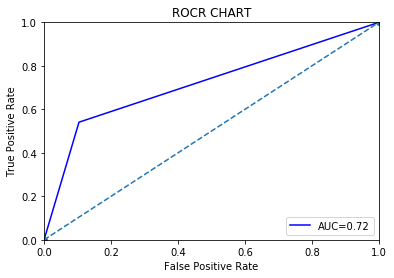

In [172]:
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show

Confusion Matrix


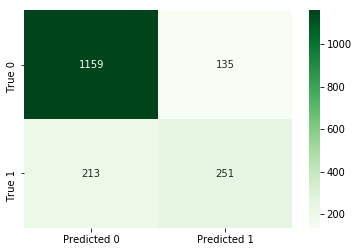

In [173]:
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show()